In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
detik_prabowo_url = 'https://www.detik.com/tag/prabowo-subianto'

response = requests.get(detik_prabowo_url)

In [14]:
response

<Response [200]>

In [15]:
soup_parsed = BeautifulSoup(response.content, 'html.parser')

In [16]:
soup_parsed

<!DOCTYPE html>

<html lang="id-ID">
<head>
<link href="https://cdn.detik.net.id" rel="dns-prefetch"/><link href="https://akcdn.detik.net.id" rel="dns-prefetch"/><link href="https://cdnv.detik.net.id" rel="dns-prefetch"/><link href="https://connect.detik.com" rel="dns-prefetch"/><link href="https://newrevive.detik.com" rel="dns-prefetch"/><link href="https://comment.detik.com" rel="dns-prefetch"/><link href="https://newcomment.detik.com" rel="dns-prefetch"/><link href="https://cdnstatic.detik.com" rel="dns-prefetch"/><link href="https://analytic.detik.com" rel="dns-prefetch"/><link href="https://connect.facebook.net" rel="dns-prefetch"/><link href="https://www.googletagmanager.com" rel="dns-prefetch"/><link href="https://platform.twitter.com" rel="dns-prefetch"/><link href="https://securepubads.g.doubleclick.net" rel="dns-prefetch"/><link href="https://pubads.g.doubleclick.net" rel="dns-prefetch"/><link href="https://www.gstatic.com" rel="dns-prefetch"/><link href="https://www.google-a

In [17]:
all_h2 = soup_parsed.findAll('h2', 'title')
all_h2

[<h2 class="title">Prabowo Akrab dengan Anies di Acara KPK, PAN: Beliau Negarawan</h2>,
 <h2 class="title">Di Balik Obrolan Anies dan Prabowo di KPK</h2>,
 <h2 class="title">PKB Puji Anies dan Prabowo Akrab di Acara KPK: Tunjukkan Kebesaran Jiwa</h2>,
 <h2 class="title">Kekuatan AMIN vs Prabowo-Gibran vs Ganjar-Mahfud Versi 4 Survei Terkini</h2>,
 <h2 class="title">Gerindra soal Prabowo-Anies Akrab di Acara KPK: Bentuk Kedewasaan Politik</h2>,
 <h2 class="title">Apresiasi AHY untuk Prabowo</h2>,
 <h2 class="title">Raffi Ahmad Cs Dampingi Prabowo Lepas Bantuan ke Gaza</h2>,
 <h2 class="title">Momen Prabowo Lepas KRI dr Radjiman Kirim Bantuan ke Gaza</h2>,
 <h2 class="title">Capres-Cawapres Paparkan Program Antikorupsi di KPK</h2>,
 <h2 class="title">Momen Capres-Cawapres Pakai Jaket Antikorupsi dari KPK</h2>,
 <h2 class="title">Momen Prabowo-Nelayan Kompak Pose Dua Jari di Kertanegara</h2>,
 <h2 class="title">Cari yang Lanjutkan Program Jokowi, Relawan GPN 08 Dukung Prabowo-Gibran</h2>,

In [18]:
title = []
for i in all_h2:
  title.append(i.text)
title

['Prabowo Akrab dengan Anies di Acara KPK, PAN: Beliau Negarawan',
 'Di Balik Obrolan Anies dan Prabowo di KPK',
 'PKB Puji Anies dan Prabowo Akrab di Acara KPK: Tunjukkan Kebesaran Jiwa',
 'Kekuatan AMIN vs Prabowo-Gibran vs Ganjar-Mahfud Versi 4 Survei Terkini',
 'Gerindra soal Prabowo-Anies Akrab di Acara KPK: Bentuk Kedewasaan Politik',
 'Apresiasi AHY untuk Prabowo',
 'Raffi Ahmad Cs Dampingi Prabowo Lepas Bantuan ke Gaza',
 'Momen Prabowo Lepas KRI dr Radjiman Kirim Bantuan ke Gaza',
 'Capres-Cawapres Paparkan Program Antikorupsi di KPK',
 'Momen Capres-Cawapres Pakai Jaket Antikorupsi dari KPK',
 'Momen Prabowo-Nelayan Kompak Pose Dua Jari di Kertanegara',
 'Cari yang Lanjutkan Program Jokowi, Relawan GPN 08 Dukung Prabowo-Gibran',
 'Prabowo Bagi-bagi Kaus Usai Kunker di Blora',
 'AHY Soroti Prabowo Kurang Diapresiasi, Singgung Jasa Menhan Saat Pandemi',
 'Di Depan Petani, Prabowo Puji Bupati Blora Kesatria Pembela Rakyat']

In [66]:
import textblob
from textblob import TextBlob
import textblob.exceptions

In [72]:
def textblob_idToEn_score(text):
  try:
    blob_obj = TextBlob(text=text)
    text_en = blob_obj.translate(from_lang='id', to='en')
  except textblob.exceptions.NotTranslated:
    print(f'{text} is not translated')
    text_en=TextBlob(text=text)

  score = text_en.sentiment.polarity
  return score

In [68]:
sample_text = title[0]
sample_text

'Prabowo Akrab dengan Anies di Acara KPK, PAN: Beliau Negarawan'

In [69]:
textblob_idToEn_score(sample_text)

0.375

In [70]:
def scrape_news(keyword='pilpres 2024'):
  keyword_url = keyword.replace(' ', '-')
  news = []

  page_num = 1

  while True:
    detik_url = f'https://www.detik.com/tag/{keyword_url}/?page={page_num}'
    print(f'Scraping Page {page_num}')

    page = requests.get(detik_url)
    soup = BeautifulSoup(page.content, "html.parser")
    # print(soup)

    articles = soup.find_all('article')

    for i in articles:
      url = i.find('a').get('href')
      title = i.find('h2', 'title').text

      polarity = textblob_idToEn_score(title)

      news.append({
        'keyword' : keyword,
        'platform' : 'detik.com',
        'url' : url,
        'title' : title,
        'score' : polarity
      })

      # if not bool(i.find('h2', 'title')):
      #   break

    if page_num > 30:
      break

    page_num+=1
  return news


In [73]:
anies_news = scrape_news('anies baswedan')

Scraping Page 1
Scraping Page 2
Scraping Page 3
Scraping Page 4
Scraping Page 5
Scraping Page 6
Scraping Page 7
Scraping Page 8
Scraping Page 9
Scraping Page 10
Scraping Page 11
Scraping Page 12
Scraping Page 13
Anies Bubble, Prabowo Gemoy, Ganjar Merakyat is not translated
Scraping Page 14
Scraping Page 15
Scraping Page 16
Scraping Page 17
Scraping Page 18
Scraping Page 19
Scraping Page 20
Scraping Page 21
Scraping Page 22
Scraping Page 23
Scraping Page 24
Scraping Page 25
Scraping Page 26
Scraping Page 27
Scraping Page 28
Scraping Page 29
Scraping Page 30
Scraping Page 31


In [80]:
anies_news

[{'keyword': 'anies baswedan',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/detiktv/d-7149282/gus-ipul-sindir-paslon-pilihan-abu-bakar-baasyir-kini-jadi-polemik',
  'title': "Gus Ipul Sindir Paslon Pilihan Abu Bakar Ba'asyir, Kini Jadi Polemik",
  'score': 0.0},
 {'keyword': 'anies baswedan',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149264/ppi-jika-pilpres-2-putaran-pdip-kubu-amin-cetak-sejarah-koalisi',
  'title': 'PPI: Jika Pilpres 2 Putaran, PDIP-Kubu AMIN Cetak Sejarah Koalisi',
  'score': 0.0},
 {'keyword': 'anies baswedan',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149255/prabowo-akrab-dengan-anies-di-acara-kpk-pan-beliau-negarawan',
  'title': 'Prabowo Akrab dengan Anies di Acara KPK, PAN: Beliau Negarawan',
  'score': 0.375},
 {'keyword': 'anies baswedan',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149241/di-balik-obrolan-anies-dan-prabowo-di-kpk',
  'title': 'Di Balik Obrolan Ani

In [79]:
print(len(anies_news))

440


In [75]:
import pandas as pd
df_anies = pd.DataFrame(anies_news)
df_anies.head()

,keyword,platform,url,title,score
0,anies baswedan,detik.com,https://news.detik.com/detiktv/d-7149282/gus-i...,Gus Ipul Sindir Paslon Pilihan Abu Bakar Ba'as...,0.000
1,anies baswedan,detik.com,https://news.detik.com/pemilu/d-7149264/ppi-ji...,"PPI: Jika Pilpres 2 Putaran, PDIP-Kubu AMIN Ce...",0.000
2,anies baswedan,detik.com,https://news.detik.com/pemilu/d-7149255/prabow...,"Prabowo Akrab dengan Anies di Acara KPK, PAN: ...",0.375
3,anies baswedan,detik.com,https://news.detik.com/pemilu/d-7149241/di-bal...,Di Balik Obrolan Anies dan Prabowo di KPK,-0.400
4,anies baswedan,detik.com,https://news.detik.com/pemilu/d-7149216/pkb-pu...,PKB Puji Anies dan Prabowo Akrab di Acara KPK:...,0.375


In [76]:
df_anies['score']

0      0.000
1      0.000
2      0.375
3     -0.400
4      0.375
       ...  
435    0.375
436   -0.400
437   -0.125
438    0.000
439    0.375
Name: score, Length: 440, dtype: float64

In [81]:
prabowo_news = scrape_news('prabowo subianto')

Scraping Page 1
Scraping Page 2
Scraping Page 3
Scraping Page 4
Scraping Page 5
Scraping Page 6
Scraping Page 7
Scraping Page 8
Anies Bubble, Prabowo Gemoy, Ganjar Merakyat is not translated
Scraping Page 9
Scraping Page 10
Scraping Page 11
Scraping Page 12
Scraping Page 13
Scraping Page 14
Scraping Page 15
Scraping Page 16
Scraping Page 17
Scraping Page 18
Scraping Page 19
Scraping Page 20
Scraping Page 21
Scraping Page 22
Scraping Page 23
Scraping Page 24
Scraping Page 25
Scraping Page 26
Scraping Page 27
Scraping Page 28
Scraping Page 29
Scraping Page 30
Scraping Page 31


In [82]:
prabowo_news

[{'keyword': 'prabowo subianto',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149255/prabowo-akrab-dengan-anies-di-acara-kpk-pan-beliau-negarawan',
  'title': 'Prabowo Akrab dengan Anies di Acara KPK, PAN: Beliau Negarawan',
  'score': 0.375},
 {'keyword': 'prabowo subianto',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149241/di-balik-obrolan-anies-dan-prabowo-di-kpk',
  'title': 'Di Balik Obrolan Anies dan Prabowo di KPK',
  'score': -0.4},
 {'keyword': 'prabowo subianto',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149216/pkb-puji-anies-dan-prabowo-akrab-di-acara-kpk-tunjukkan-kebesaran-jiwa',
  'title': 'PKB Puji Anies dan Prabowo Akrab di Acara KPK: Tunjukkan Kebesaran Jiwa',
  'score': 0.375},
 {'keyword': 'prabowo subianto',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149206/kekuatan-amin-vs-prabowo-gibran-vs-ganjar-mahfud-versi-4-survei-terkini',
  'title': 'Kekuatan AMIN vs Pr

In [83]:
print(len(prabowo_news))

440


In [84]:
df_prabowo = pd.DataFrame(prabowo_news)
df_prabowo.head()

,keyword,platform,url,title,score
0,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7149255/prabow...,"Prabowo Akrab dengan Anies di Acara KPK, PAN: ...",0.3750
1,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7149241/di-bal...,Di Balik Obrolan Anies dan Prabowo di KPK,-0.4000
2,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7149216/pkb-pu...,PKB Puji Anies dan Prabowo Akrab di Acara KPK:...,0.3750
3,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7149206/kekuat...,Kekuatan AMIN vs Prabowo-Gibran vs Ganjar-Mahf...,0.5000
4,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7149176/gerind...,Gerindra soal Prabowo-Anies Akrab di Acara KPK...,0.1875


In [85]:
ganjar_news = scrape_news('ganjar pranowo')

Scraping Page 1
Scraping Page 2
Scraping Page 3
Scraping Page 4
Scraping Page 5
Scraping Page 6
Scraping Page 7
Scraping Page 8
Scraping Page 9
Anies Bubble, Prabowo Gemoy, Ganjar Merakyat is not translated
Scraping Page 10
Scraping Page 11
Scraping Page 12
Scraping Page 13
Scraping Page 14
Scraping Page 15
Scraping Page 16
Scraping Page 17
Scraping Page 18
Scraping Page 19
Scraping Page 20
Scraping Page 21
Scraping Page 22
Scraping Page 23
Scraping Page 24
Scraping Page 25
Scraping Page 26
Scraping Page 27
Scraping Page 28
Scraping Page 29
Scraping Page 30
Scraping Page 31


In [86]:
ganjar_news

[{'keyword': 'ganjar pranowo',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149264/ppi-jika-pilpres-2-putaran-pdip-kubu-amin-cetak-sejarah-koalisi',
  'title': 'PPI: Jika Pilpres 2 Putaran, PDIP-Kubu AMIN Cetak Sejarah Koalisi',
  'score': 0.0},
 {'keyword': 'ganjar pranowo',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149241/di-balik-obrolan-anies-dan-prabowo-di-kpk',
  'title': 'Di Balik Obrolan Anies dan Prabowo di KPK',
  'score': -0.4},
 {'keyword': 'ganjar pranowo',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/pemilu/d-7149223/ada-sesuatu-di-balik-maruarar-sirait-mundur-menurut-ganjar',
  'title': 'Ada Sesuatu di Balik Maruarar Sirait Mundur Menurut Ganjar',
  'score': -0.4},
 {'keyword': 'ganjar pranowo',
  'platform': 'detik.com',
  'url': 'https://news.detik.com/detiktv/d-7149212/ganjar-sebut-mahfud-akan-bahas-soal-pupuk-di-debat-cawapres-kedua',
  'title': 'Ganjar Sebut Mahfud Akan Bahas soal Pupuk di Debat Caw

In [87]:
len(ganjar_news)

440

In [88]:
df_ganjar = pd.DataFrame(ganjar_news)
df_ganjar.head()

,keyword,platform,url,title,score
0,ganjar pranowo,detik.com,https://news.detik.com/pemilu/d-7149264/ppi-ji...,"PPI: Jika Pilpres 2 Putaran, PDIP-Kubu AMIN Ce...",0.0
1,ganjar pranowo,detik.com,https://news.detik.com/pemilu/d-7149241/di-bal...,Di Balik Obrolan Anies dan Prabowo di KPK,-0.4
2,ganjar pranowo,detik.com,https://news.detik.com/pemilu/d-7149223/ada-se...,Ada Sesuatu di Balik Maruarar Sirait Mundur Me...,-0.4
3,ganjar pranowo,detik.com,https://news.detik.com/detiktv/d-7149212/ganja...,Ganjar Sebut Mahfud Akan Bahas soal Pupuk di D...,0.0
4,ganjar pranowo,detik.com,https://news.detik.com/pemilu/d-7149206/kekuat...,Kekuatan AMIN vs Prabowo-Gibran vs Ganjar-Mahf...,0.5


In [89]:
def content_info(df):
  df = df.copy()
  keyword = df.loc[0,'keyword']

  df['pos'] = np.where(df.score > 0, 1, 0)
  df['neu'] = np.where(df.score == 0, 1, 0)
  df['neg'] = np.where(df.score < 0, 1, 0)

  print(f'Total data with keyword {keyword} : {df.shape[0]}')
  print(f'With {df.pos.sum()} positive, {df.neu.sum()} neutral, {df.neg.sum()} negative')

In [90]:
content_info(df_anies)

Total data with keyword anies baswedan : 440
With 106 positive, 278 neutral, 56 negative


In [91]:
content_info(df_prabowo)

Total data with keyword prabowo subianto : 440
With 113 positive, 287 neutral, 40 negative


In [92]:
content_info(df_ganjar)

Total data with keyword ganjar pranowo : 440
With 116 positive, 269 neutral, 55 negative


In [ ]:
from pathlib import Path

In [93]:
def data_visualization(df):
  df = df.copy()

  df['pos'] = np.where(df.score > 0, 1, 0)
  df['neu'] = np.where(df.score == 0, 1, 0)
  df['neg'] = np.where(df.score < 0, 1, 0)
  
  tmp_df = df.groupby(['keyword'])[['pos', 'neu', 'neg']].sum().reset_index()

  key = list(tmp_df.keyword.unique())
  df_map = tmp_df[['pos', 'neu', 'neg']].to_dict(orient='list')

  x = np.arange(len(key))
  width = 0.25
  multiplier = 0  

  fig, ax = plt.subplots()

  for attr, measurement in df_map.items():
    offset = width*multiplier
    if attr=='pos':
      color='green'
    elif attr=='neu':
      color='lightblue'
    else:
      color='red'
    rects=ax.bar(x+offset, measurement, width, label=attr, color=color)
    ax.bar_label(rects, padding=3)
    multiplier+=1

  ax.set_ylabel('Count')
  ax.set_title(f'Sentiment Analysis for News on Detik.com')
  ax.set_xticks(x + width * (multiplier - 1) / 2 )
  ax.set_xticklabels(key, ha='center')
  ax.legend(loc = 'upper left', bbox_to_anchor=(1,1))

  plt.show()


In [94]:
df_all = pd.concat([df_anies, df_prabowo, df_ganjar]).reset_index(drop=True)

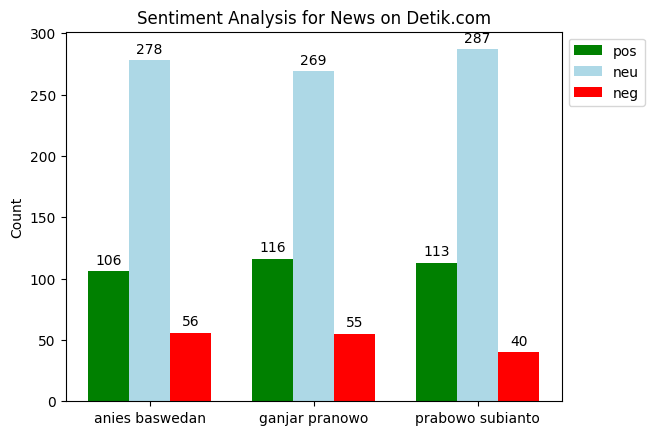

In [95]:
data_visualization(df_all)

In [97]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [98]:
stopwords = ['di', 'ke', 'untuk', 'dari', 'dan', 'ini', 'itu', 'juga', 'saat']

In [106]:
def wc(df, img_path):
  text = ' '.join([i for i in df.title])
  print(f'There are {len(text)} words from news title with keyword {df.loc[0, "keyword"]}')

  mask = np.array(Image.open(img_path).convert('RGBA'))
  wordcloud_por = WordCloud(stopwords=stopwords, background_color='white', max_words=5000, mask=mask).generate(text)

  image_colors=ImageColorGenerator(mask)
  plt.figure(figsize=(7,7))
  plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation='bilinear')
  plt.axis('off')
  plt.show()

There are 27806 words from news title with keyword anies baswedan


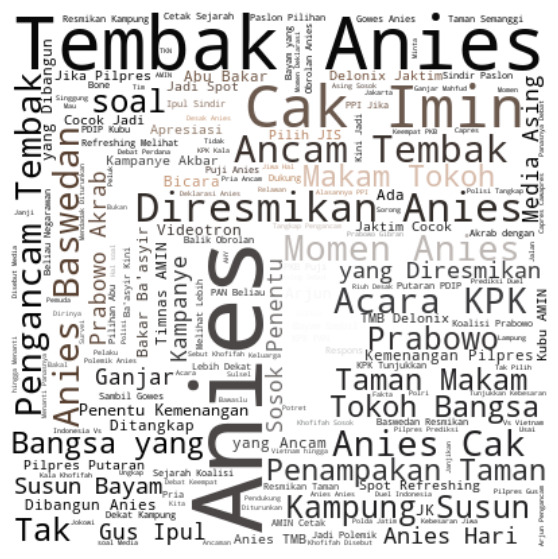

In [107]:
wc(df_anies, './anies.png')

There are 28053 words from news title with keyword prabowo subianto


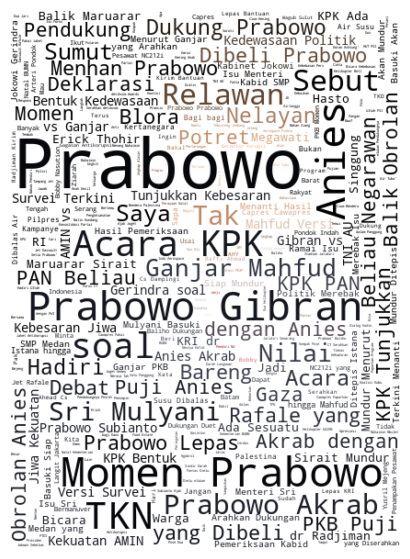

In [104]:
wc(df_prabowo, './prabowo.png')

There are 27010 words from news title with keyword ganjar pranowo


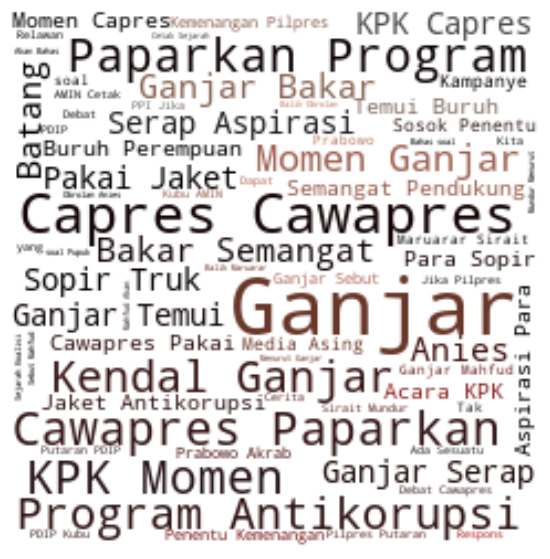

In [109]:
wc(df_ganjar, './ganjar-pranowo.png')